In [ ]:
!pip install pingouin
#!pip install pandas
#!pip install numpy
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from pingouin import ttest


In [10]:
#Create some lists
x=[3,4,2,5,6,7,5,4,3,6] #Hours Spent in Studying
y=[7,10,3,5,6,8,6,9,5,4]# Points Scored by 10 students
z=[3,6,7,8,9,7,8,6,5,7] # Hours spent sleeping 

In [24]:

for i in x :
     i= x[i] +1
        if i > 6:
           print(i)

IndentationError: unexpected indent (996245552.py, line 3)

##### T Test
pg.ttest(x,y)


In [28]:
pg.ttest(x,z)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.848958,18,two-sided,0.010656,"[-3.65, -0.55]",1.274093,4.954,0.768644


In [ ]:
pg.ttest(y,z)

In [32]:
ttest3=pg.ttest(x,z)
ttest3
#print(ttest3)

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -2.848958   18   two-sided  0.010656  [-3.65, -0.55]  1.274093  4.954   

           power  
T-test  0.768644  


In [33]:
ttest3=pg.ttest(x,z)
#Send the results to your working directory
ttest3.to_csv("ttest-result.csv")

In [ ]:
#Check for normality
import numpy as np
import pingouin as pg
#np.random.seed(123)
x = np.random.normal(size=10)
ax = pg.qqplot(z, dist='norm');

In [ ]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

#Examine the data
df.info()
?df

In [ ]:
#Run Anova
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

In [ ]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

In [42]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tests(data=df, dv='Scores', within='Time', subject='Subject',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ------  --------
Time        August   January  True      True          -1.740  59.000  two-sided        0.087     0.131  fdr_bh       0.582    -0.328
Time        August   June     True      True          -2.743  59.000  two-sided        0.008     0.024  fdr_bh       4.232    -0.483
Time        January  June     True      True          -1.024  59.000  two-sided        0.310     0.310  fdr_bh       0.232    -0.170



In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)

In [51]:
data = pg.read_dataset('chi2_independence')
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


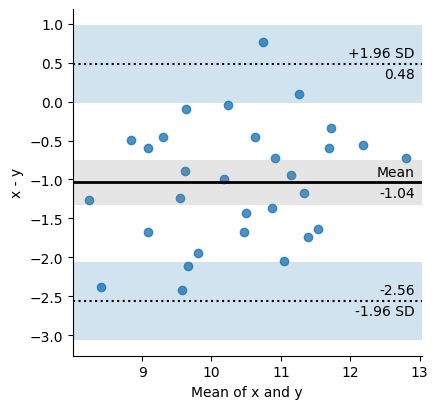

In [56]:
import numpy as np
import pingouin as pg
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
sns.set(style='ticks', context='notebook', font_scale=1.2)
d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size
# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired')
# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='b', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

Text(0.5, 1.0, 'Effect of meditation on school performance')

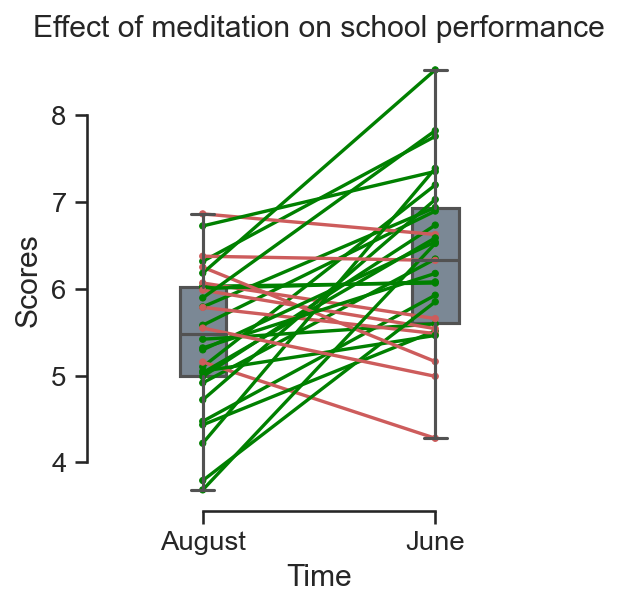

In [58]:
import pingouin as pg
import numpy as np
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject', dpi=150)
ax.set_title("Effect of meditation on school performance")

In [ ]:
import pingouin as pg

# Example 1 | ANOVA
df = pg.read_dataset('mixed_anova')
df.anova(dv='Scores', between='Group', detailed=True)

# Example 2 | Pairwise correlations
data = pg.read_dataset('mediation')
data.pairwise_corr(columns=['X', 'M', 'Y'], covar=['Mbin'])

# Example 3 | Partial correlation matrix
data.pcorr()

In [ ]:
#One-way repeated measures ANOVA using a wide-format dataset
import pingouin as pg
data = pg.read_dataset('rm_anova_wide')
pg.rm_anova(data)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
?df

In [9]:
# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[np.random.normal(5.4, size=n),
                   np.random.normal(5.8, size=n),
                   np.random.normal(6.4, size=n)]

In [12]:
df1 = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [13]:
df1

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [14]:
# DESCRIPTIVE STATS
pg.print_table(df.head())


  Scores  Time    Group      Subject
--------  ------  -------  ---------
   5.971  August  Control          0
   4.309  August  Control          1
   6.933  August  Control          2
   5.187  August  Control          3
   4.779  August  Control          4



                      Scores           Subject          
                        mean       std    mean       std
Time    Group                                           
August  Control     5.508184  1.029795    14.5  8.803408
        Meditation  5.332482  0.813022    44.5  8.803408
January Control     5.603746  0.900437    14.5  8.803408
        Meditation  5.970728  1.074590    44.5  8.803408
June    Control     5.591624  1.179973    14.5  8.803408
        Meditation  6.345328  0.933034    44.5  8.803408


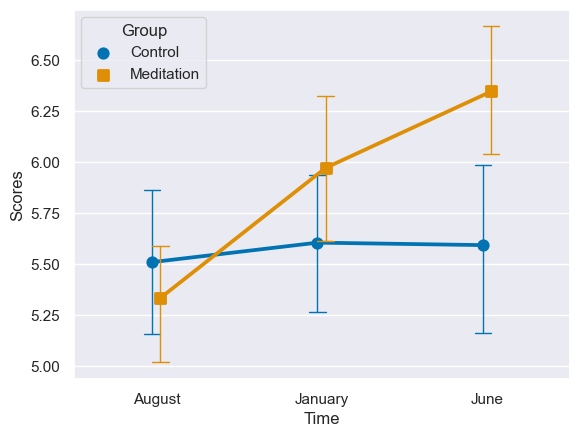

In [17]:
# import seaborn as sns
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')

print(df.groupby(['Time', 'Group']).agg(['mean', 'std']))


In [ ]:

# ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group',
                     subject='Subject', data=df)
pg.print_table(aov)

In [19]:

# POST-HOC TESTS
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)

C:\Users\Dr. Wale Awe\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided        0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided        0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided        0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided        0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided        0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided        0.157  

In [ ]:
#Correlation
correl=pg.corr(x,y)
correl
#correl.to_csv("Cor Result.csv")